# Chargement des données : 
# Projet de classification d'images d'avions commerciaux et militaires 
### Auteurs : Groupe 5

*Faical Toubali Hadaoui*

*Mehdi Sensali*

*Ignacio Lucas Oros Campo*

*Thibaud Merieux*

*Cédric Martin*


<br>Dans notre projet **"Airplanes Image Classification"**, nous avons choisi de classifier les images d'avions militaires/commerciaux  selon deux version :


<br>**Première version** : Images d'avions associées à 2 labels différents : Deux classes **Militaire** et **Commercial**.

<br>**Deuxième version** : Images d'avions associées à N labels différents correspondant aux différents modèles d'avions militiaires/commerciaux que notre base de données contient. 

![<Photo>](https://zupimages.net/up/21/11/spon.png)

La base de données a un nombre totale d'images de l'ordre de 4000. à savoir, en moyenne 400 images dans chaque modèle d'avion commercial/militaire qui sont les suivant : 

Militaire :
- Dassault Rafale
- Lockheed Martin F-35 Lightning  II
- Eurofighter Typhoon
- Soukoi Su-57
- A400M Atlas d'Airbus

Commerciale :
- Airbus A380
- Airbus Belluga
- Boeing 747
- Boeing 777
- Dassault Falcon 8X

<br>Les deux versions sons réalisés sur ce notebook:.


--------------------------------------------------------------------------------

<br>**Première version**: 
Nous avons réparti les images dans 3 ensembles (et donc 3 dossiers): 

***Train*** : se compose de 70%  de la base de données totale, par conséquent, 70% d'images de chaque modèle d'avions. 

***Validation*** : se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.

***Test*** se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.


<br>Chacun de ces dossiers comporte un sous-dossier par classe (Commerciale/ Militaire), qui contient lui meme les images des différents modèles d'avions. L'arborescence est résumée sur l'image ci-dessus.

--------------------------------------------------------------------------------


<br>**Deuxième version**: 
Nous avons réparti les images dans 3 ensembles (et donc 3 dossiers): 

***Train*** : se compose de 70%  de la base de données totale, par conséquent, 70% d'images de chaque modèle d'avions. 

***Validation*** : se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.

***Test*** se compose de 15% de la base de données totale, par conséquent, 15% d'images de chaque modèle d'avions.



<br>Chacun de ces dossiers comporte deux sous-dossiers (Commerciale/Militaire) qui se composent eux memes des différents modèles d'avions. Ainsi, dans cette version nous aurons autant de labels qu'autant des N classes correspondants aux différents modèles d'avions. Les labels seront de la forme suivante : (Type/Modèle). Par exemple :

<br>Commercial/Airbus_A380 ou Military/Rafale. 

<br>Ainsi, le nombre de labels va correspondre à la somme de chaque type(Commercial/Militaire) multiplié par le nombre de modèles d'avions qu'il contint. Puisque nous avons 5 modèles d'avions par type (Commercial/Militaire) nous aurons  alors 10 labels.

--------------------------------------------------------------------------------


<br>Nous avons choisi d'héberger notre base de données sur Github : l'intérêt est qu'un **git clone** depuis Google Colab est très rapide.

[Lien de GitHub vers notre repository](https://github.com/faicaltoubali/Airplanes_Image_Classification)

In [ ]:
!git clone https://github.com/faicaltoubali/Airplanes_Image_Classification.git
path = "./Airplanes_Image_Classification/"

Cloning into 'Airplanes_Image_Classification'...
remote: Enumerating objects: 4027, done.
remote: Counting objects: 100% (501/501), done.
remote: Compressing objects: 100% (370/370), done.
remote: Total 4027 (delta 201), reused 405 (delta 122), pack-reused 3526
Receiving objects: 100% (4027/4027), 654.47 MiB | 26.85 MiB/s, done.
Resolving deltas: 100% (228/228), done.
Checking out files: 100% (7088/7088), done.


Maintenant que les données sont téléchargées localement depuis Google Colab, nous allons charger les images et les labels. 

In [ ]:
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
import pandas as pd
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


#Version 1 : Classification binaire :    Commercial/Militaire




Script de chargement des images


In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):


    num_images = 0

    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        for j in range(len(dirs)):
          dirs_modeles = sorted(os.listdir(data_path + dataset + '/' + classes[i] + '/' + dirs[j]))
          num_images += len(dirs_modeles)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    x_def = np.zeros((num_images, 1))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        for j in range(len(dirs)):
          dirs_modeles = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j]))
 
          # Chargement des images, 
          for idx_img in range(len(dirs_modeles)):
            item = dirs_modeles[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j] + '/' +item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + dirs[j] + '/' + item)
                img = img.convert('RGB')

                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))

                x[current_index] = np.asarray(img) 
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Labélisation des images

In [ ]:
labels = ['Commercial', 'Military']

x_train, y_train = load_data(path, labels, dataset='Dataset/Train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='Dataset/Validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='Dataset/Test', image_size=64)
print(x_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(2519, 64, 64, 3) (2519, 1)
(523, 64, 64, 3) (523, 1)
(526, 64, 64, 3) (526, 1)


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

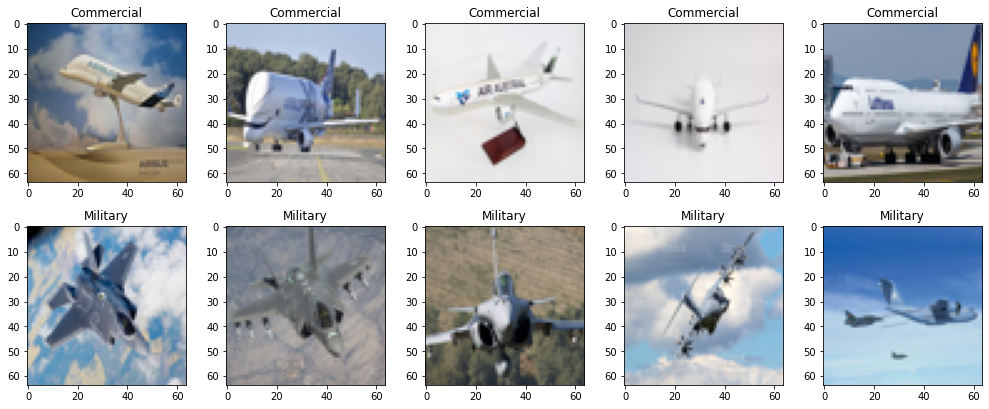

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 14))

#shuffle_indices = np.random.permutation(1000)
random_commercialplanes_indices = random.sample(range(1, 1000), 5)
random_militaryplanes_indices = random.sample(range(1001, 2519 ), 5)
shuffle_indices = random_commercialplanes_indices + random_militaryplanes_indices

for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

Création de listes contenant les noms des images des ensemble d'apprentissage, de validation et de test, ainsi que les label (0: militaire, 1:commerciale) associés.


In [ ]:
import os
import shutil

#Images d'entrainement
train_filenames_militaire = os.listdir(path + "Dataset/Train/Military")
train_filenames_commerciale = os.listdir(path + "Dataset/Train/Commercial")
if not os.path.exists(path + "Dataset/Train/Train"):
  os.mkdir(path + "Dataset/Train/Train")

path_train = path + "Dataset/Train/"


for i in range(len(train_filenames_militaire)):
  subfolder = os.listdir(path + "Dataset/Train/Military/" + train_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_train+"Military/"+ train_filenames_militaire[i] + '/' + filename, path_train+"Train/"+filename)

for i in range(len(train_filenames_commerciale)):
  subfolder = os.listdir(path + "Dataset/Train/Commercial/" + train_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_train+"Commercial/"+ train_filenames_commerciale[i] + '/' + filename, path_train+"Train/"+filename)


train_filenames = os.listdir(path + "Dataset/Train/Train")
train_categories=[]
for filename in train_filenames:
    category = filename.split('-')[0]
    if category == 'Military':
        train_categories.append(0)
    else:
        train_categories.append(1)


#Images de validation
validation_filenames_militaire = os.listdir(path + "Dataset/Validation/Military")
validation_filenames_commerciale = os.listdir(path + "Dataset/Validation/Commercial")
if not os.path.exists(path + "Dataset/Validation/Validation"):
  os.mkdir(path + "Dataset/Validation/Validation")

path_validation = path + "Dataset/Validation/"

for i in range(len(validation_filenames_militaire)) :
  subfolder = os.listdir(path + "Dataset/Validation/Military/" + validation_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_validation+"Military/"+ validation_filenames_militaire[i] + '/' + filename, path_validation +"Validation/"+filename)

for i in range(len(validation_filenames_commerciale)) :
  subfolder = os.listdir(path + "Dataset/Validation/Commercial/" + validation_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_validation+"Commercial/"+ validation_filenames_commerciale[i] + '/' + filename, path_validation+"Validation/"+filename)


validation_filenames = os.listdir(path + "Dataset/Validation/Validation")
validation_categories=[]
for filename in validation_filenames:
    category = filename.split('-')[0]
    if category == 'Military':
        validation_categories.append(0)
    else:
        validation_categories.append(1)


#Images de test
test_filenames_militaire = os.listdir(path + "Dataset/Test/Military")
test_filenames_commerciale = os.listdir(path + "Dataset/Test/Commercial")
if not os.path.exists(path + "Dataset/Test/Test"):
  os.mkdir(path + "Dataset/Test/Test")

path_test = path + "Dataset/Test/"

for i in range(len(test_filenames_militaire)):
  subfolder =  os.listdir(path + "Dataset/Test/Military/" + test_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_test +"Military/"+ test_filenames_militaire[i] + '/' + filename, path_test +"Test/"+filename)


for i in range(len(test_filenames_commerciale)):
  subfolder =  os.listdir(path + "Dataset/Test/Commercial/" + test_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_test +"Commercial/"+ test_filenames_commerciale[i] + '/' + filename, path_test+"Test/"+filename)


test_filenames = os.listdir(path + "Dataset/Test/Test")
test_categories=[]
for filename in test_filenames:
    category = filename.split('-')[0]
    if category == 'Military':
        test_categories.append(0)
    else:
        test_categories.append(1)

DataFrames


In [ ]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})


#Images de validation
validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})


#Images de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


train_df['category'] = train_df['category'].astype(str)
validation_df['category'] = validation_df['category'].astype(str)
test_df['category'] = test_df['category'].astype(str)

total_train = train_df.shape[0]
total_validate = validation_df.shape[0]

Visualisation des images : 

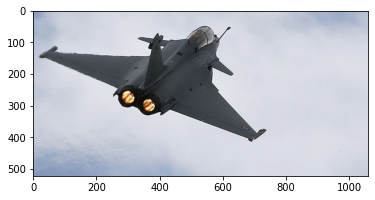

In [ ]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(test_filenames)
image = load_img(path + "Dataset/Test/Test/" +sample)
plt.imshow(image)
plt.show()

Création des batch pour l'entraînement

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_size = 150


#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path + "Dataset/Train/Train/",
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    class_mode='binary',
    batch_size=batch_size
)

#Images de validation
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    path + "Dataset/Validation/Validation/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

#Images de test
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    path + "Dataset/Test/Test/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2519 validated image filenames belonging to 2 classes.
Found 523 validated image filenames belonging to 2 classes.
Found 526 validated image filenames belonging to 2 classes.


In [ ]:
labels= {0: 'Military', 1: 'Commercial'}
labels.get(0), labels.get(1)

('Military', 'Commercial')

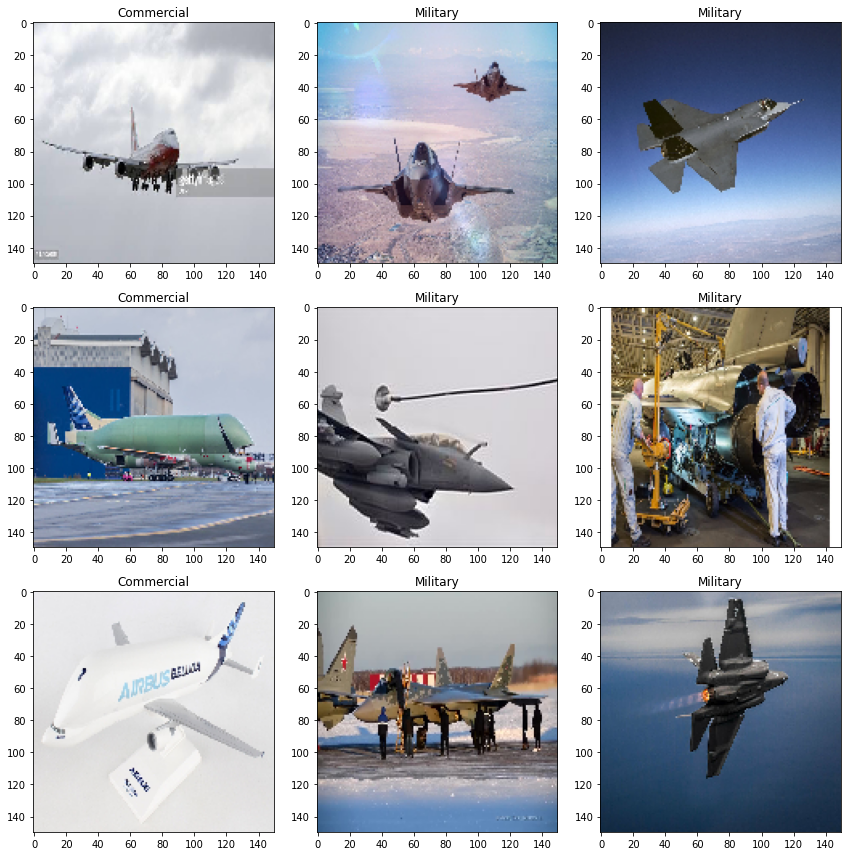

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.title(labels.get(Y_batch[0]))
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Réseau d'entraînement

In [ ]:
from keras.regularizers import l1


model = models.Sequential()

model.add(Conv2D(32, (3, 3), padding="same" ,activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
                 
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))    

model.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
                 
model.add(Conv2D(128, (3, 3), padding="same", activation="relu", ))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ...

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dense(512, activation = "relu", input_dim=128))  # Couche dense, à 512 neurones activity_regularizer=l1(0.001))
model.add(Dense(1, activation="sigmoid"))   # Couche de sortie


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 128)      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
 29/158 [====>.........................] - ETA: 36s - loss: 0.7211 - acc: 0.5680

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 88s 353ms/step - loss: 0.6597 - acc: 0.6169 - val_loss: 0.5657 - val_acc: 0.7533
Epoch 2/10
158/158 [==============================] - 55s 348ms/step - loss: 0.5055 - acc: 0.7688 - val_loss: 0.6170 - val_acc: 0.6558
Epoch 3/10
158/158 [==============================] - 55s 348ms/step - loss: 0.4978 - acc: 0.7534 - val_loss: 0.4559 - val_acc: 0.7897
Epoch 4/10
158/158 [==============================] - 55s 348ms/step - loss: 0.4147 - acc: 0.8111 - val_loss: 0.4403 - val_acc: 0.7859
Epoch 5/10
158/158 [==============================] - 54s 345ms/step - loss: 0.3731 - acc: 0.8360 - val_loss: 0.4209 - val_acc: 0.8050
Epoch 6/10
158/158 [==============================] - 55s 348ms/step - loss: 0.3214 - acc: 0.8794 - val_loss: 0.3961 - val_acc: 0.8145
Epoch 7/10
158/158 [==============================] - 57s 360ms/step - loss: 0.2671 - acc: 0.8994 - val_loss: 0.3702 - val_acc: 0.8432
Epoch 8/10
158/158 [==============================] - 57s 360ms/st

In [ ]:
def plot_training_analysis(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

Version 1 : Mise en Oeuvre 1 : 10 Epochs, sans régularisation, sans augmentation de base de données

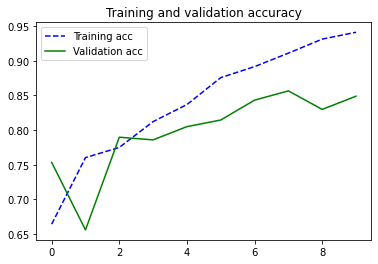

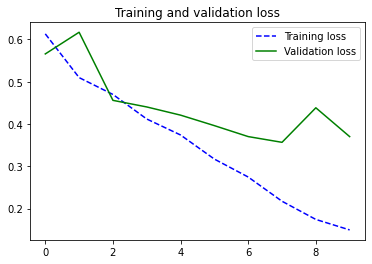

In [ ]:
plot_training_analysis(history)


Augmentation de la base de données

In [ ]:
batch_size = 16
image_size = 150


train_datagen_2 = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator_augmented = train_datagen_2.flow_from_dataframe(
    train_df, 
    path + 'Dataset/Train/Train/',
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    class_mode='binary',
    batch_size=batch_size
)


Found 2519 validated image filenames belonging to 2 classes.


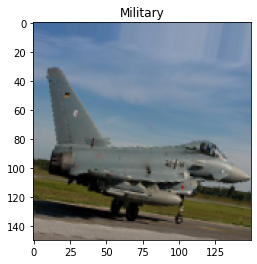

In [ ]:
example_x, example_y = train_generator_augmented.next()
for i in range(0,1):
    plt.imshow(example_x[i])
    plt.title(labels.get(example_y[i]))

    plt.show()

In [ ]:
from keras.regularizers import l1


model2 = models.Sequential()

model2.add(Conv2D(32, (3, 3), padding="same" ,activation="relu", input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
                 
model2.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))    

model2.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
                 
model2.add(Conv2D(128, (3, 3), padding="same", activation="relu", ))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# ...

model2.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model2.add(Dense(512, activation = "relu", input_dim=128, ))  # Couche dense, à 512 neurones activity_regularizer=l1(0.001)
model2.add(Dense(1, activation="sigmoid"))   # Couche de sortie


In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
history2 = model2.fit(train_generator_augmented, validation_data=validation_generator, epochs=10)

Epoch 1/10
 64/158 [===========>..................] - ETA: 35s - loss: 0.6957 - acc: 0.5362

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 69s 437ms/step - loss: 0.6903 - acc: 0.5482 - val_loss: 0.6530 - val_acc: 0.6138
Epoch 2/10
158/158 [==============================] - 68s 432ms/step - loss: 0.6461 - acc: 0.6319 - val_loss: 0.5727 - val_acc: 0.7132
Epoch 3/10
158/158 [==============================] - 69s 437ms/step - loss: 0.6009 - acc: 0.6767 - val_loss: 0.5338 - val_acc: 0.7170
Epoch 4/10
158/158 [==============================] - 69s 438ms/step - loss: 0.5677 - acc: 0.7144 - val_loss: 0.5324 - val_acc: 0.7323
Epoch 5/10
158/158 [==============================] - 68s 431ms/step - loss: 0.5577 - acc: 0.7349 - val_loss: 0.4637 - val_acc: 0.7897
Epoch 6/10
158/158 [==============================] - 66s 419ms/step - loss: 0.5443 - acc: 0.7390 - val_loss: 0.6972 - val_acc: 0.6558
Epoch 7/10
158/158 [==============================] - 69s 436ms/step - loss: 0.4997 - acc: 0.7578 - val_loss: 0.5239 - val_acc: 0.7572
Epoch 8/10
158/158 [==============================] - 67s 426ms/st

Version 1 : Mise en oeuvre 3 : 10 Epochs avec augmentation de la base données, sans régularisation

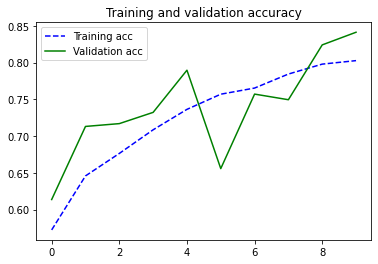

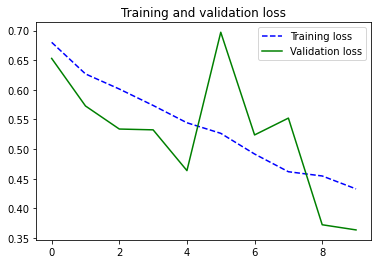

In [ ]:
plot_training_analysis(history2)

Version 1 : Mise en oeuvre 3 : 40 Epochs avec augmentation de la base données, sans régularisation

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
history3 = model2.fit(train_generator_augmented, validation_data=validation_generator, epochs=40)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 66s 415ms/step - loss: 0.7007 - acc: 0.5797 - val_loss: 0.6704 - val_acc: 0.5621
Epoch 2/40
158/158 [==============================] - 66s 415ms/step - loss: 0.6549 - acc: 0.6301 - val_loss: 0.5528 - val_acc: 0.7151
Epoch 3/40
158/158 [==============================] - 64s 403ms/step - loss: 0.5871 - acc: 0.6946 - val_loss: 0.5442 - val_acc: 0.7247
Epoch 4/40
158/158 [==============================] - 63s 399ms/step - loss: 0.5747 - acc: 0.7185 - val_loss: 0.5395 - val_acc: 0.7266
Epoch 5/40
158/158 [==============================] - 63s 397ms/step - loss: 0.5673 - acc: 0.7129 - val_loss: 0.6081 - val_acc: 0.6922
Epoch 6/40
158/158 [==============================] - 63s 401ms/step - loss: 0.5157 - acc: 0.7351 - val_loss: 0.4785 - val_acc: 0.7897
Epoch 7/40
158/158 [==============================] - 63s 399ms/step - loss: 0.5141 - acc: 0.7655 - val_loss: 0.4495 - val_acc: 0.7897
Epoch 8/40
158/158 [==============================] - 62s 394ms/st

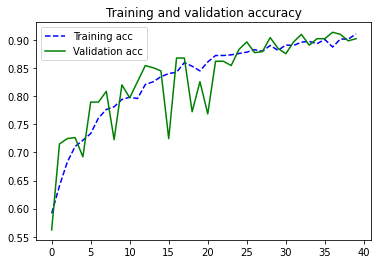

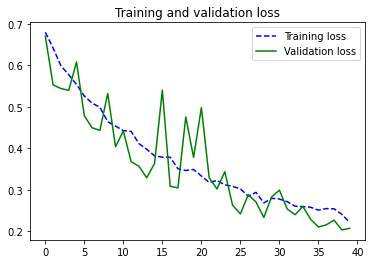

In [ ]:
plot_training_analysis(history3)

# Version 1 : Test des performances du modèle entrainé en mise en oeuvre 3:

Sauvegarde du réseau entraîné dans la machine locale

In [ ]:
model2.save('classification_images_cnn_binaire.h5')

In [ ]:
from google.colab import files
files.download("classification_images_cnn_binaire.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_test, y_test = load_data(path, labels, dataset='Dataset/Test', image_size=150)

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=1)

17/17 [==============================] - 0s 13ms/step - loss: 50.7438 - acc: 0.8232


In [ ]:
y_predicted = model2.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

Visualisation des images prédites

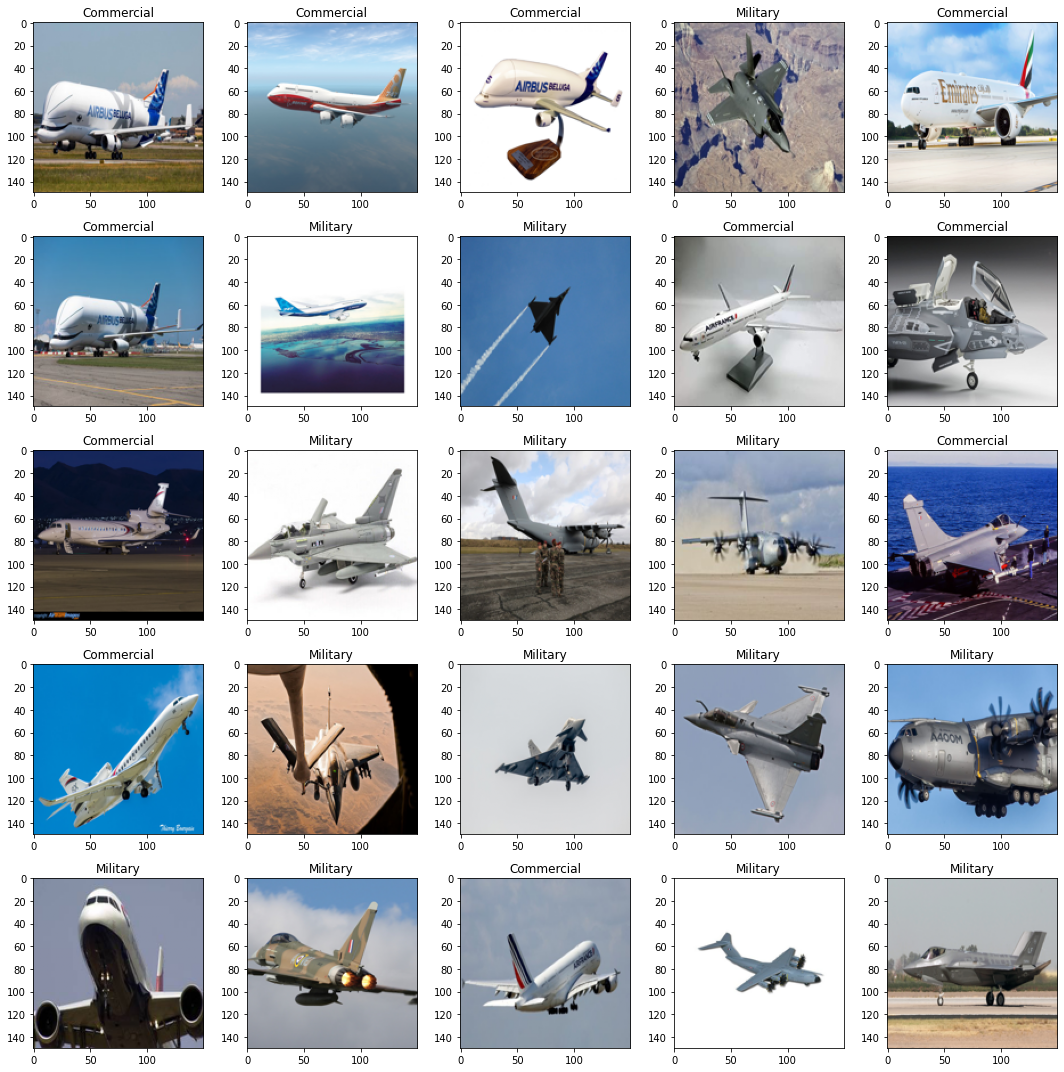

In [ ]:
plt.figure(figsize=(15, 15))

random_index = random.sample(range(1, 500), 25)


for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    image2 = x_test[random_index[i]]
    plt.title(labels[int(y_predicted[random_index[i]])])
    plt.imshow(image2/255)

plt.tight_layout()
plt.show()

In [ ]:
test_features = model2.predict_classes(test_generator)
print(test_features)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]


In [ ]:
true_labels = np.asarray(test_generator.classes)
print(true_labels)

[0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 

In [ ]:
predictions = np.round(model2.predict(x_test),0)
label_classes =['Commercial', 'Military']

In [ ]:
classification_metrics = metrics.classification_report(y_test, predictions, target_names = label_classes )

In [ ]:
print(classification_metrics)

              precision    recall  f1-score   support

  Commercial       0.83      0.86      0.85       299
    Military       0.81      0.78      0.79       227

    accuracy                           0.82       526
   macro avg       0.82      0.82      0.82       526
weighted avg       0.82      0.82      0.82       526



In [ ]:
#y_test_evaluate = keras.utils.to_categorical(y_test)
#categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
#categorical_predictions = pd.DataFrame(predictions).idxmax(axis=1)
confusion_matrix = confusion_matrix(np.asarray(y_test),np.asarray(predictions))

In [ ]:
confusion_matrix

array([[257,  42],
       [ 51, 176]])

In [ ]:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion_matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

Matrice de confusion des résultats de la 3ème mise en oeuvre (40 epochs)

[[257  42]
 [ 51 176]]
Confusion matrix, without normalization


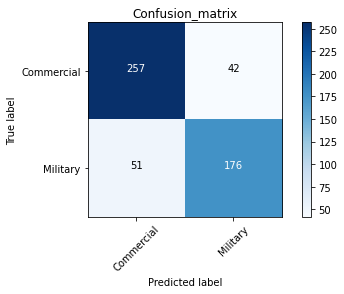

In [ ]:
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,label_classes)

#Version 2 : Classification multi-classes : 10 labels différents correspondant aux différents modèles d'avions militiaires/commerciaux que contient notre base de données :


Chargement de la base de données

In [ ]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data2(data_path, classes, dataset='train', image_size=64):


    num_images = 0

    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    x_def = np.zeros((num_images, 1))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))

        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Labélisation des images

In [ ]:
labels2 = ['Commercial/Airbus_A380', 'Commercial/Airbus_Belluga', 'Commercial/Boeing_747', 'Commercial/Boeing_777', 'Commercial/Falcon_8x',
          'Military/A400M', 'Military/Eurofighter_Typhoon', 'Military/Rafale', 'Military/F-35', 'Military/Su-57']

x2_train, y2_train = load_data2(path, labels2, dataset='Dataset/Train', image_size=64)
print(x2_train.shape, y2_train.shape)

x2_val, y2_val = load_data2(path, labels2, dataset='Dataset/Validation', image_size=64)
print(x2_val.shape, y2_val.shape)

x2_test, y2_test = load_data2(path, labels2, dataset='Dataset/Test', image_size=64)
print(x2_test.shape, y2_test.shape)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(2519, 64, 64, 3) (2519, 1)
(523, 64, 64, 3) (523, 1)
(526, 64, 64, 3) (526, 1)


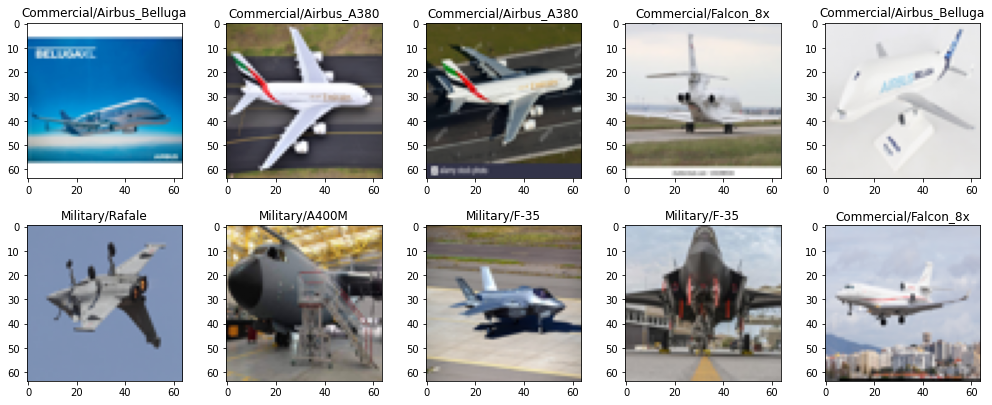

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 14))

random_commercialplanes_indices2 = random.sample(range(1, 1000), 5)
random_militaryplanes_indices2 = random.sample(range(1001, 2519), 5)
shuffle_indices2 = random_commercialplanes_indices2 + random_militaryplanes_indices2

for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    image2 = x2_train[shuffle_indices2[i]]
    plt.title(labels2[int(y2_train[shuffle_indices2[i]])])
    plt.imshow(image2/255)

plt.tight_layout()
plt.show()

Création de listes contenant les noms des images des ensemble d'apprentissage, de validation et de test, ainsi que les labels associés.

In [ ]:
import os
import shutil

#Images d'entrainement
#train_filenames_Airbus_A380 = os.listdir(path + "Dataset/Train/Commercial/Airbus_A380")
#train_filenames_Airbus_Belluga = os.listdir(path + "Dataset/Train/Commercial/Airbus_Belluga")
#train_filenames_Boeing_747 = os.listdir(path + "Dataset/Train/Commercial/Boeing_747")
#train_filenames_Boeing_777 = os.listdir(path + "Dataset/Train/Commercial/Boeing_777")
#train_filenames_Falcon_8x = os.listdir(path + "Dataset/Train/Commercial/Falcon_8x")
#train_filenames_A400M = os.listdir(path + "Dataset/Train/Military/A400M")
#train_filenames_Eurofighter_Typhoon = os.listdir(path + "Dataset/Train/Military/Eurofighter_Typhoon")
#train_filenames_F_35 = os.listdir(path + "Dataset/Train/Military/F-35")
#train_filenames_Rafale = os.listdir(path + "Dataset/Train/Military/Rafale")
#train_filenames_Su_57 = os.listdir(path + "Dataset/Train/Military/Su-57")

train_filenames_militaire = os.listdir(path + "Dataset/Train/Military")
train_filenames_commerciale = os.listdir(path + "Dataset/Train/Commercial")

if not os.path.exists(path + "Dataset/Train/Train"):
  os.mkdir(path + "Dataset/Train/Train")

path_train = path + "Dataset/Train/"


for i in range(len(train_filenames_militaire)):
  subfolder = os.listdir(path + "Dataset/Train/Military/" + train_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_train+"Military/"+ train_filenames_militaire[i] + '/' + filename, path_train+"Train/"+filename)

for i in range(len(train_filenames_commerciale)):
  subfolder = os.listdir(path + "Dataset/Train/Commercial/" + train_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_train+"Commercial/"+ train_filenames_commerciale[i] + '/' + filename, path_train+"Train/"+filename)


train_filenames = os.listdir(path + "Dataset/Train/Train")
train_categories=[]
for filename in train_filenames:
    category = filename.split('-')[1]
    
    if category == 'Airbus_A380':
                train_categories.append(0)    
                
    elif category == 'Airbus_Belluga':
                train_categories.append(1)

    elif category =='Boeing_747':
                train_categories.append(2)

    elif category =='Boeing_777':
                train_categories.append(3)

    elif category =='Falcon_8x':
                train_categories.append(4)

    elif category =='A400M':
                train_categories.append(5)

    elif category =='Eurofighter_Typhoon':
                train_categories.append(6)

    elif category =='F35':
                train_categories.append(7)

    elif category =='Rafale':
                train_categories.append(8)

    elif category =='Su57':
                train_categories.append(9)      

#Images de validation
validation_filenames_militaire = os.listdir(path + "Dataset/Validation/Military")
validation_filenames_commerciale = os.listdir(path + "Dataset/Validation/Commercial")
if not os.path.exists(path + "Dataset/Validation/Validation"):
  os.mkdir(path + "Dataset/Validation/Validation")

path_validation = path + "Dataset/Validation/"

for i in range(len(validation_filenames_militaire)) :
  subfolder = os.listdir(path + "Dataset/Validation/Military/" + validation_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_validation+"Military/"+ validation_filenames_militaire[i] + '/' + filename, path_validation +"Validation/"+filename)

for i in range(len(validation_filenames_commerciale)) :
  subfolder = os.listdir(path + "Dataset/Validation/Commercial/" + validation_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_validation+"Commercial/"+ validation_filenames_commerciale[i] + '/' + filename, path_validation+"Validation/"+filename)


validation_filenames = os.listdir(path + "Dataset/Validation/Validation")
validation_categories=[]
for filename in validation_filenames:
     category = filename.split('-')[1]
    
     if category == 'Airbus_A380':
                validation_categories.append(0)    
                
     elif category == 'Airbus_Belluga':
                validation_categories.append(1)

     elif category =='Boeing_747':
                validation_categories.append(2)

     elif category =='Boeing_777':
                validation_categories.append(3)

     elif category =='Falcon_8x':
                validation_categories.append(4)

     elif category =='A400M':
                validation_categories.append(5)

     elif category =='Eurofighter_Typhoon':
                validation_categories.append(6)

     elif category =='F35':
                validation_categories.append(7)

     elif category =='Rafale':
                validation_categories.append(8)

     elif category =='Su57':
                validation_categories.append(9)


#Images de test
test_filenames_militaire = os.listdir(path + "Dataset/Test/Military")
test_filenames_commerciale = os.listdir(path + "Dataset/Test/Commercial")
if not os.path.exists(path + "Dataset/Test/Test"):
  os.mkdir(path + "Dataset/Test/Test")

path_test = path + "Dataset/Test/"

for i in range(len(test_filenames_militaire)):
  subfolder =  os.listdir(path + "Dataset/Test/Military/" + test_filenames_militaire[i])
  for filename in subfolder:
    shutil.copyfile(path_test +"Military/"+ test_filenames_militaire[i] + '/' + filename, path_test +"Test/"+filename)


for i in range(len(test_filenames_commerciale)):
  subfolder =  os.listdir(path + "Dataset/Test/Commercial/" + test_filenames_commerciale[i])
  for filename in subfolder:
    shutil.copyfile(path_test +"Commercial/"+ test_filenames_commerciale[i] + '/' + filename, path_test+"Test/"+filename)


test_filenames = os.listdir(path + "Dataset/Test/Test")
test_categories=[]
for filename in test_filenames:
    category = filename.split('-')[1]
    
    if category == 'Airbus_A380':
                test_categories.append(0)    
                
    elif category == 'Airbus_Belluga':
                test_categories.append(1)

    elif category =='Boeing_747':
                test_categories.append(2)

    elif category =='Boeing_777':
                test_categories.append(3)

    elif category =='Falcon_8x':
                test_categories.append(4)

    elif category =='A400M':
                test_categories.append(5)

    elif category =='Eurofighter_Typhoon':
                test_categories.append(6)

    elif category =='F35':
                test_categories.append(7)

    elif category =='Rafale':
                test_categories.append(8)

    elif category =='Su57':
                test_categories.append(9)


Data frames

In [ ]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})


#Images de validation
validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})


#Images de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


train_df['category'] = train_df['category'].astype(str)
validation_df['category'] = validation_df['category'].astype(str)
test_df['category'] = test_df['category'].astype(str)

total_train = train_df.shape[0]
total_validate = validation_df.shape[0]

Visualisation d'une image aléatoire

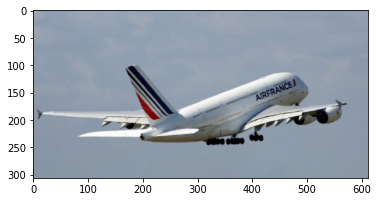

In [ ]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(test_filenames)
image = load_img(path + "Dataset/Test/Test/" +sample)
plt.imshow(image)
plt.show()

Répartition de la base donnée en batch de taille 16

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_size = 150


#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator2 = train_datagen.flow_from_dataframe(
    train_df, 
    path + "Dataset/Train/Train/",
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    class_mode='categorical',
    batch_size=batch_size
)

#Images de validation
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator2 = validation_datagen.flow_from_dataframe(
    validation_df, 
    path + "Dataset/Validation/Validation/", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

#Images de test
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator2 = test_datagen.flow_from_dataframe(
    test_df, 
    path + "Dataset/Test/Test/", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2519 validated image filenames belonging to 10 classes.
Found 523 validated image filenames belonging to 10 classes.
Found 526 validated image filenames belonging to 10 classes.


In [ ]:
labelsM = {0:'Commercial/Airbus_A380', 1:'Commercial/Airbus_Belluga', 2:'Commercial/Boeing_747', 3:'Commercial/Boeing_777', 4:'Commercial/Falcon_8x',
          5:'Military/A400M', 6:'Military/Eurofighter_Typhoon', 7:'Military/Rafale', 8:'Military/F-35', 9:'Military/Su-57'}
labelsM.get(5)

'Military/A400M'

Affichage des images labelisées

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


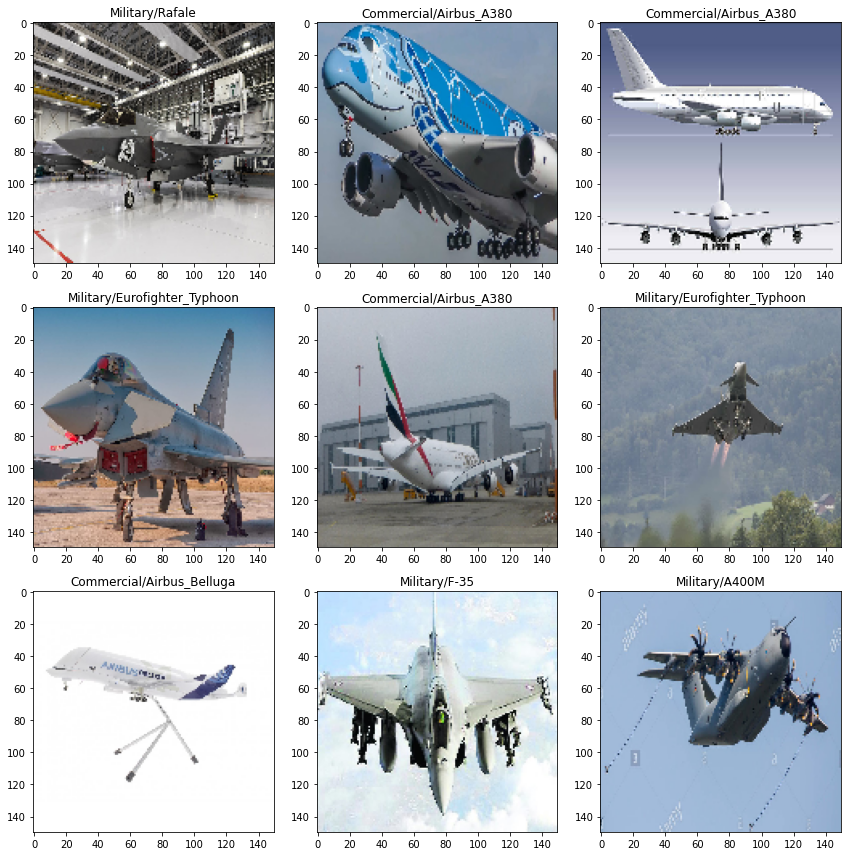

In [ ]:
plt.figure(figsize=(12, 12))
def one(L):
    i = 0
    for k in range(0, len(L)) :
        if L[k] == 1 :
           i = k
    return i
    
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in train_generator2:
        image = X_batch[0]
        print(Y_batch[0])
        plt.title(labelsM.get(one(Y_batch[0])))
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Mise en oeuvre 1 :Réseau de base : Version simplifié d'AlexNet 

In [ ]:
from keras.regularizers import l1


modelM = models.Sequential()

modelM.add(Conv2D(32, (3, 3), padding="same" ,activation="relu", input_shape=(150,150,3)))
modelM.add(MaxPooling2D(pool_size=(2, 2)))
                 
modelM.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
modelM.add(MaxPooling2D(pool_size=(2, 2)))    

modelM.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
modelM.add(MaxPooling2D(pool_size=(2, 2)))
                 
modelM.add(Conv2D(128, (3, 3), padding="same", activation="relu", ))
modelM.add(MaxPooling2D(pool_size=(2, 2)))

# ...

modelM.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
modelM.add(Dense(512, activation = "relu", input_dim=128, activity_regularizer=l1(0.001)))  # Couche dense, à 512 neurones
modelM.add(Dense(10, activation="softmax"))   # Couche de sortie


In [ ]:
modelM.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 128)     

In [ ]:
modelM.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [ ]:
historyM = modelM.fit(train_generator2, validation_data=validation_generator2, epochs=40)

Epoch 1/40
 30/158 [====>.........................] - ETA: 33s - loss: 2.3273 - acc: 0.1165

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 54s 333ms/step - loss: 2.3029 - acc: 0.1306 - val_loss: 2.2817 - val_acc: 0.1759
Epoch 2/40
158/158 [==============================] - 52s 330ms/step - loss: 2.1954 - acc: 0.1970 - val_loss: 2.1429 - val_acc: 0.2371
Epoch 3/40
158/158 [==============================] - 52s 327ms/step - loss: 2.0117 - acc: 0.2874 - val_loss: 2.0258 - val_acc: 0.2887
Epoch 4/40
158/158 [==============================] - 52s 329ms/step - loss: 1.8301 - acc: 0.3507 - val_loss: 1.9494 - val_acc: 0.3308
Epoch 5/40
158/158 [==============================] - 52s 330ms/step - loss: 1.5557 - acc: 0.4613 - val_loss: 1.9385 - val_acc: 0.3518
Epoch 6/40
158/158 [==============================] - 52s 331ms/step - loss: 1.2358 - acc: 0.5840 - val_loss: 1.9173 - val_acc: 0.4092
Epoch 7/40
158/158 [==============================] - 52s 332ms/step - loss: 0.8533 - acc: 0.7521 - val_loss: 2.0393 - val_acc: 0.4589
Epoch 8/40
158/158 [==============================] - 52s 329ms/st

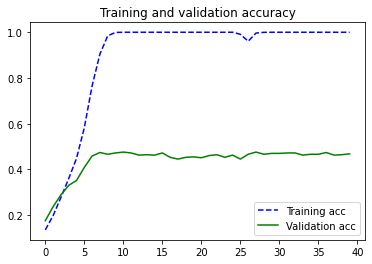

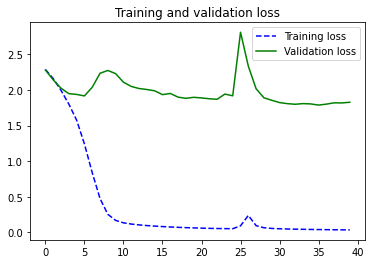

In [ ]:
plot_training_analysis(historyM)

Mise en oeuvre 2 :Augmentation de la base de données


In [ ]:
batch_size = 16
image_size = 150


train_datagen_2 = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


train_generator_augmented2 = train_datagen_2.flow_from_dataframe(
    train_df, 
    path + 'Dataset/Train/Train/',
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    class_mode='categorical',
    batch_size=batch_size
)



Found 2519 validated image filenames belonging to 10 classes.


In [ ]:
history_augmented = modelM.fit(train_generator_augmented2, validation_data=validation_generator2, epochs=40)

Epoch 1/40
132/158 [========================>.....] - ETA: 9s - loss: 2.2965 - acc: 0.1579

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 67s 426ms/step - loss: 2.2815 - acc: 0.1651 - val_loss: 2.0176 - val_acc: 0.3289
Epoch 2/40
158/158 [==============================] - 67s 421ms/step - loss: 2.1579 - acc: 0.2171 - val_loss: 2.0443 - val_acc: 0.2524
Epoch 3/40
158/158 [==============================] - 67s 421ms/step - loss: 2.0579 - acc: 0.2445 - val_loss: 1.9031 - val_acc: 0.2983
Epoch 4/40
158/158 [==============================] - 66s 419ms/step - loss: 2.0209 - acc: 0.2624 - val_loss: 1.8508 - val_acc: 0.3518
Epoch 5/40
158/158 [==============================] - 67s 422ms/step - loss: 1.9455 - acc: 0.3021 - val_loss: 1.9008 - val_acc: 0.3499
Epoch 6/40
158/158 [==============================] - 65s 415ms/step - loss: 1.9006 - acc: 0.3160 - val_loss: 1.9450 - val_acc: 0.3078
Epoch 7/40
158/158 [==============================] - 66s 416ms/step - loss: 1.8806 - acc: 0.3164 - val_loss: 1.6958 - val_acc: 0.4187
Epoch 8/40
158/158 [==============================] - 65s 414ms/st

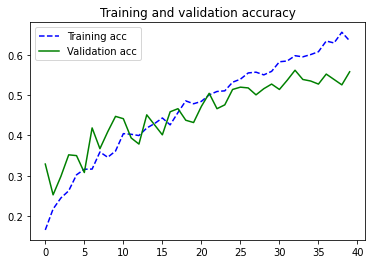

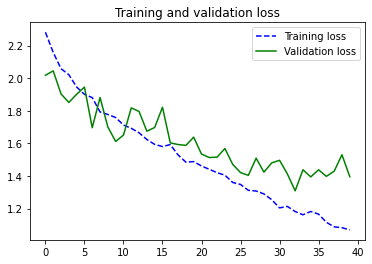

In [ ]:
plot_training_analysis(history_augmented)

Mise en oeuvre 3 : 80 epochs + avec augmentation de données + avec augmentation de la capacité duréseau

In [ ]:
modelF = models.Sequential()

modelF.add(Conv2D(32, (3, 3), padding="same" ,activation="relu", input_shape=(150,150,3)))
modelF.add(MaxPooling2D(pool_size=(2, 2)))
                 
modelF.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
modelF.add(MaxPooling2D(pool_size=(2, 2)))    

modelF.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
modelF.add(MaxPooling2D(pool_size=(2, 2)))
                 
modelF.add(Conv2D(128, (3, 3), padding="same", activation="relu" ))
modelF.add(MaxPooling2D(pool_size=(2, 2)))

modelF.add(Flatten()) 

modelF.add(Dense(128,activation = "relu"))

modelF.add(Dense(128,activation = "relu"))

modelF.add(Dense(10, activation="softmax"))   # Couche de sortie


In [ ]:
modelF.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

historyF = modelF.fit(train_generator_augmented2, validation_data=validation_generator2, epochs=80)

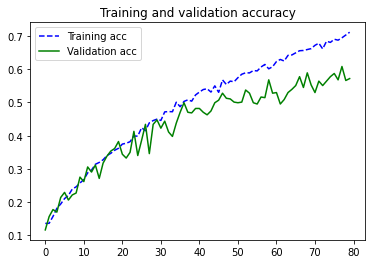

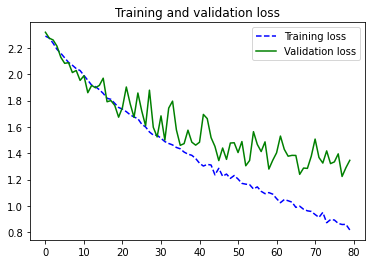

In [ ]:
plot_training_analysis(historyF)

Mise en oeuvre 4 : Transfer Learning VGG comme extracteur de caractéristiques


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Extraction des caractèristiques du VGG16

In [ ]:
train_features = conv_base.predict(train_generator2)
train_features = np.reshape(train_features,(train_features.shape[0],4*4*512))

val_features = conv_base.predict(validation_generator2)
val_features = np.reshape(val_features,(val_features.shape[0],4*4*512))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from keras.utils.np_utils import to_categorical

train_data = train_df.to_numpy()
y_train = np.array([int(numeric_string) for numeric_string in train_data[:,1]])
y_train = to_categorical(y_train, num_classes=10)

validation_data = validation_df.to_numpy()
y_val = np.array([int(numeric_string) for numeric_string in validation_data[:,1]])
y_val = to_categorical(y_val, num_classes=10 )

Réseau de neurones dense simple attaché au VGG16

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5)) # On utilise du DropOut sur cette couche dense car elle comporte un grand nombre
                               # de paramètres et risque d'être très sujette au sur-apprentissage.
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=3e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(val_features, y_val))

Epoch 1/50
158/158 [==============================] - 1s 4ms/step - loss: 2.4907 - acc: 0.1083 - val_loss: 2.3017 - val_acc: 0.1071
Epoch 2/50
158/158 [==============================] - 1s 3ms/step - loss: 2.2844 - acc: 0.1209 - val_loss: 2.3079 - val_acc: 0.1109
Epoch 3/50
158/158 [==============================] - 1s 3ms/step - loss: 2.2742 - acc: 0.1539 - val_loss: 2.2980 - val_acc: 0.1185
Epoch 4/50
158/158 [==============================] - 1s 3ms/step - loss: 2.2623 - acc: 0.1597 - val_loss: 2.3060 - val_acc: 0.1319
Epoch 5/50
158/158 [==============================] - 1s 3ms/step - loss: 2.2155 - acc: 0.1736 - val_loss: 2.3082 - val_acc: 0.1243
Epoch 6/50
158/158 [==============================] - 1s 3ms/step - loss: 2.2078 - acc: 0.1861 - val_loss: 2.3141 - val_acc: 0.1090
Epoch 7/50
158/158 [==============================] - 1s 3ms/step - loss: 2.1710 - acc: 0.2010 - val_loss: 2.3098 - val_acc: 0.1377
Epoch 8/50
158/158 [==============================] - 1s 3ms/step - loss: 2.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 2,099,978
Trainable params: 2,099,978
Non-trainable params: 0
_________________________________________________________________


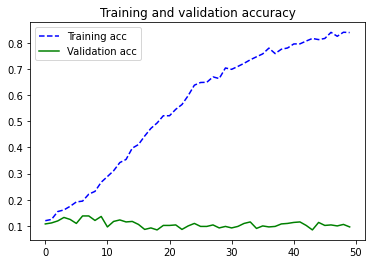

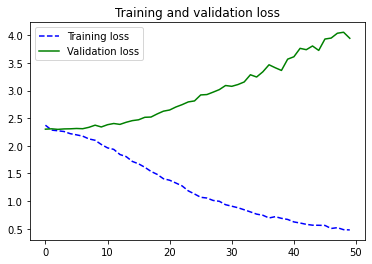

In [ ]:
plot_training_analysis(history)

Mise en oeuvre 5 : Transfer Learning : VGG-16 avec augmentation de base de données

In [ ]:
from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

conv_base.trainable = False 
model2.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4), # Taux d'apprentissage réduit pour ne pas tout casser, ni risquer le sur-apprentissage !
              metrics=['acc'])

history = model2.fit(
    train_generator_augmented2,
    epochs=50,
    validation_data=validation_generator2)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
158/158 [==============================] - 80s 501ms/step - loss: 2.2110 - acc: 0.1959 - val_loss: 1.6996 - val_acc: 0.4187
Epoch 2/50
158/158 [==============================] - 76s 483ms/step - loss: 1.7941 - acc: 0.3597 - val_loss: 1.5769 - val_acc: 0.4455
Epoch 3/50
158/158 [==============================] - 78s 492ms/step - loss: 1.6346 - acc: 0.4207 - val_loss: 1.4371 - val_acc: 0.4570
Epoch 4/50
158/158 [==============================] - 77s 489ms/step - loss: 1.5172 - acc: 0.4681 - val_loss: 1.4010 - val_acc: 0.4857
Epoch 5/50
158/158 [==============================] - 78s 489ms/step - loss: 1.4815 - acc: 0.4770 - val_loss: 1.2766 - val_acc: 0.5411
Epoch 6/50
158/158 [==============================] - 78s 493ms/step - loss: 1.4298 - acc: 0.4890 - val_loss: 1.2511 - val_acc: 0.5392
Epoch 7/50
158/158 [==============================] - 78s 493ms/step - loss: 1.3365 - acc: 0.5433 - val_loss: 1.2113 - val_acc: 0.5660
Epoch 8/50
158/158 [==============================] - 7

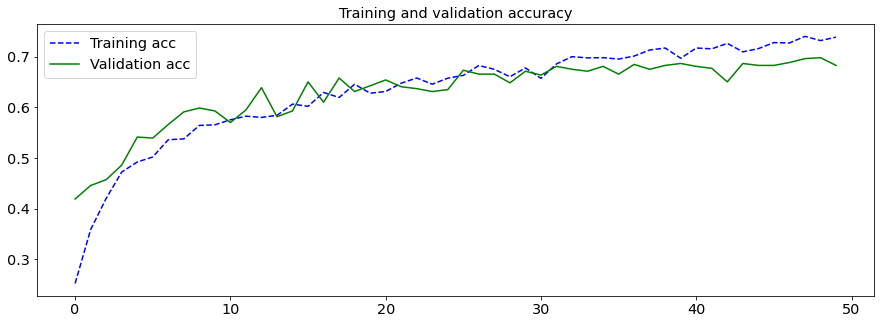

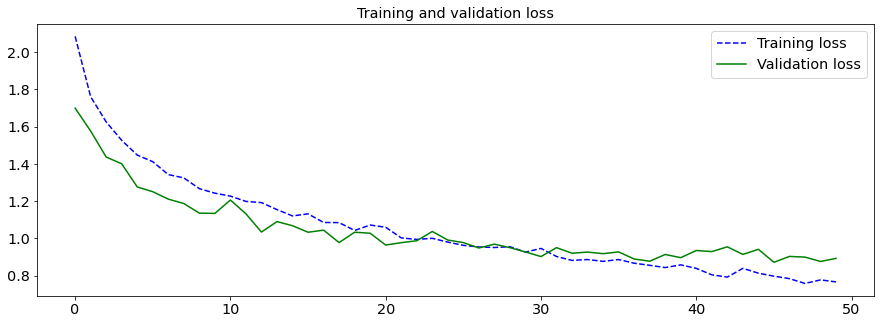

In [ ]:
plot_training_analysis(history)

Mise en oeuvre 6 : Fine Tuning : VGG-16 avec augmentation de base de données

In [ ]:

conv_base.trainable = True
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 16,814,666
Trainable params: 16,814,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5), # Taux d'apprentissage réduit pour ne pas tout casser, ni risquer le sur-apprentissage !
              metrics=['acc'])

history = model2.fit(
    train_generator_augmented2,
    epochs=40,
    validation_data=validation_generator2)

Epoch 1/40
 65/158 [===========>..................] - ETA: 44s - loss: 0.7627 - acc: 0.7109

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 92s 562ms/step - loss: 0.7605 - acc: 0.7230 - val_loss: 0.8252 - val_acc: 0.7055
Epoch 2/40
158/158 [==============================] - 87s 552ms/step - loss: 0.6687 - acc: 0.7628 - val_loss: 0.7232 - val_acc: 0.7457
Epoch 3/40
158/158 [==============================] - 87s 552ms/step - loss: 0.5568 - acc: 0.8170 - val_loss: 0.7221 - val_acc: 0.7610
Epoch 4/40
158/158 [==============================] - 88s 552ms/step - loss: 0.5267 - acc: 0.8231 - val_loss: 0.7542 - val_acc: 0.7400
Epoch 5/40
158/158 [==============================] - 88s 555ms/step - loss: 0.4566 - acc: 0.8437 - val_loss: 0.7086 - val_acc: 0.7495
Epoch 6/40
158/158 [==============================] - 87s 550ms/step - loss: 0.4026 - acc: 0.8604 - val_loss: 0.6777 - val_acc: 0.7667
Epoch 7/40
158/158 [==============================] - 87s 548ms/step - loss: 0.4413 - acc: 0.8504 - val_loss: 0.6497 - val_acc: 0.8011
Epoch 8/40
158/158 [==============================] - 87s 549ms/st

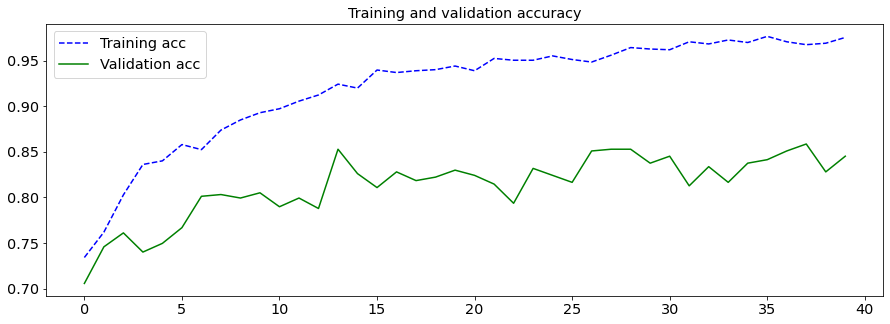

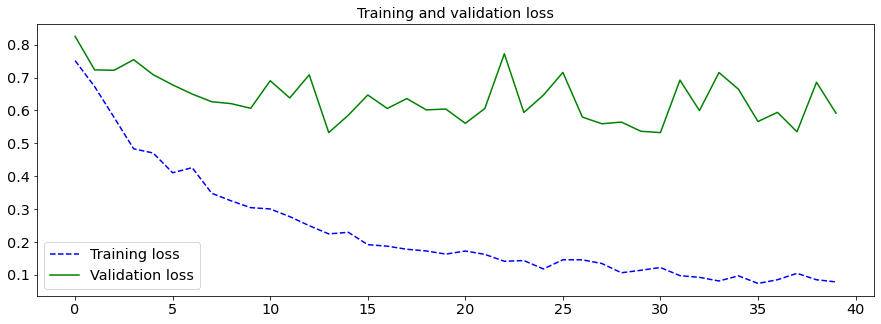

In [ ]:
plot_training_analysis(history)

# D'autres mise en oeuvres qui n'ont pas été mentionnées rapport 

ResNet50

In [ ]:
from keras.applications import ResNet50

conv_base2 = ResNet50(weights='imagenet', # On utilise les poids du réseau déjà pré-entrainé sur la base de données ImageNet
                  include_top=False, # On ne conserve pas la partie Dense du réseau originel
                  input_shape=(150, 150, 3))

In [ ]:
conv_base2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
train_features = conv_base2.predict(train_generator2)
train_features = np.reshape(train_features,(train_features.shape[0],5*5*2048))

val_features = conv_base2.predict(validation_generator2)
val_features = np.reshape(val_features,(val_features.shape[0],5*5*2048))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
from keras.utils.np_utils import to_categorical

train_data = train_df.to_numpy()
y_train = np.array([int(numeric_string) for numeric_string in train_data[:,1]])
y_train = to_categorical(y_train, num_classes=10)

validation_data = validation_df.to_numpy()
y_val = np.array([int(numeric_string) for numeric_string in validation_data[:,1]])
y_val = to_categorical(y_val, num_classes=10 )

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=5*5*2048))
model.add(layers.Dropout(0.5)) # On utilise du DropOut sur cette couche dense car elle comporte un grand nombre
                               # de paramètres et risque d'être très sujette au sur-apprentissage.


model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.Adam(lr=3e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(val_features, y_val))

Epoch 1/50
158/158 [==============================] - 2s 10ms/step - loss: 2.7581 - acc: 0.1207 - val_loss: 2.2988 - val_acc: 0.1147
Epoch 2/50
158/158 [==============================] - 1s 9ms/step - loss: 2.2964 - acc: 0.1424 - val_loss: 2.2962 - val_acc: 0.1147
Epoch 3/50
158/158 [==============================] - 1s 9ms/step - loss: 2.2968 - acc: 0.1408 - val_loss: 2.2995 - val_acc: 0.1166
Epoch 4/50
158/158 [==============================] - 1s 9ms/step - loss: 2.2974 - acc: 0.1272 - val_loss: 2.2981 - val_acc: 0.1166
Epoch 5/50
158/158 [==============================] - 1s 9ms/step - loss: 2.2942 - acc: 0.1390 - val_loss: 2.2970 - val_acc: 0.1147
Epoch 6/50
158/158 [==============================] - 1s 9ms/step - loss: 2.2924 - acc: 0.1467 - val_loss: 2.2960 - val_acc: 0.1147
Epoch 7/50
158/158 [==============================] - 1s 9ms/step - loss: 2.2908 - acc: 0.1377 - val_loss: 2.2952 - val_acc: 0.1147
Epoch 8/50
158/158 [==============================] - 1s 9ms/step - loss: 2

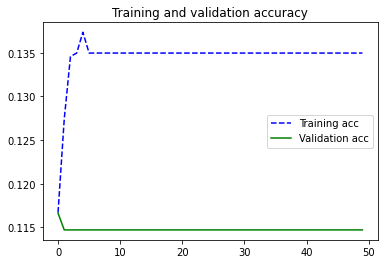

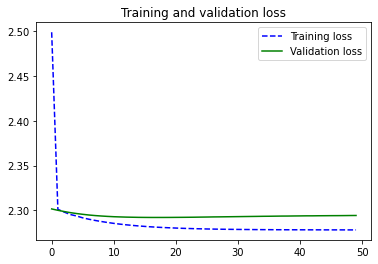

In [ ]:
plot_training_analysis(history)

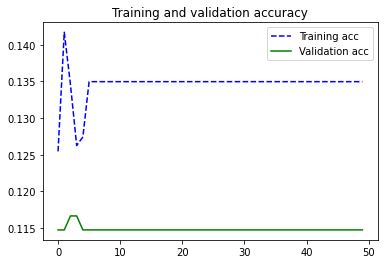

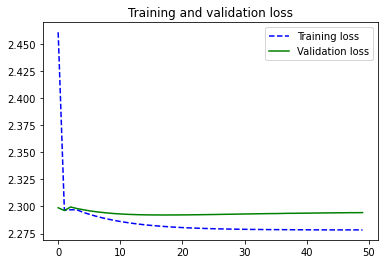

In [ ]:
plot_training_analysis(history)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base2)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 49,807,754
Trainable params: 49,754,634
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
conv_base.trainable = False
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 49,807,754
Trainable params: 49,754,634
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

history = model.fit(
    train_generator_augmented2,
    epochs=10,
    validation_data=validation_generator2)



Epoch 1/10
105/158 [==================>...........] - ETA: 19s - loss: 4.7330 - acc: 0.2076

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 75s 438ms/step - loss: 4.0181 - acc: 0.2380 - val_loss: 2.3064 - val_acc: 0.1205
Epoch 2/10
158/158 [==============================] - 68s 430ms/step - loss: 1.3620 - acc: 0.5109 - val_loss: 2.4441 - val_acc: 0.1071
Epoch 3/10
158/158 [==============================] - 68s 430ms/step - loss: 1.1822 - acc: 0.5790 - val_loss: 2.5875 - val_acc: 0.1128
Epoch 4/10
158/158 [==============================] - 68s 429ms/step - loss: 1.0748 - acc: 0.6279 - val_loss: 2.3372 - val_acc: 0.2180
Epoch 5/10
158/158 [==============================] - 68s 431ms/step - loss: 0.9830 - acc: 0.6521 - val_loss: 1.6058 - val_acc: 0.4264
Epoch 6/10
158/158 [==============================] - 68s 429ms/step - loss: 0.8889 - acc: 0.6828 - val_loss: 1.9136 - val_acc: 0.4398
Epoch 7/10
158/158 [==============================] - 68s 430ms/step - loss: 0.8116 - acc: 0.7063 - val_loss: 1.0827 - val_acc: 0.6482
Epoch 8/10
158/158 [==============================] - 68s 431ms/st

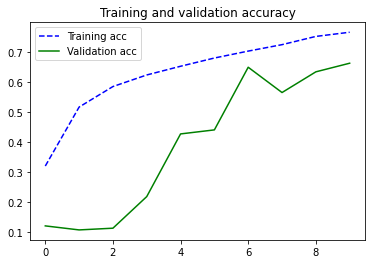

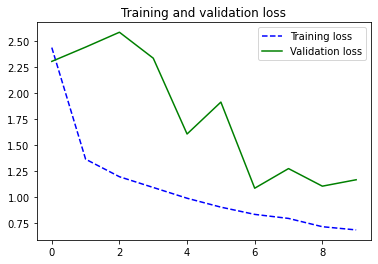

In [ ]:
plot_training_analysis(history)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
conv_base.trainable = False
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

history = model.fit(
    train_generator_augmented2,
    epochs=50,
    validation_data=validation_generator2)


Epoch 1/50
 26/158 [===>..........................] - ETA: 40s - loss: 2.6056 - acc: 0.0779

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 72s 438ms/step - loss: 2.4331 - acc: 0.1089 - val_loss: 2.1949 - val_acc: 0.1931
Epoch 2/50
158/158 [==============================] - 66s 421ms/step - loss: 2.2261 - acc: 0.1721 - val_loss: 2.0792 - val_acc: 0.2428
Epoch 3/50
158/158 [==============================] - 67s 423ms/step - loss: 2.1337 - acc: 0.1935 - val_loss: 1.9625 - val_acc: 0.2753
Epoch 4/50
158/158 [==============================] - 67s 422ms/step - loss: 2.0908 - acc: 0.2119 - val_loss: 1.8385 - val_acc: 0.2849
Epoch 5/50
158/158 [==============================] - 66s 419ms/step - loss: 2.0588 - acc: 0.2279 - val_loss: 1.8075 - val_acc: 0.2906
Epoch 6/50
158/158 [==============================] - 65s 412ms/step - loss: 1.9984 - acc: 0.2291 - val_loss: 1.7856 - val_acc: 0.2906
Epoch 7/50
158/158 [==============================] - 65s 414ms/step - loss: 1.9520 - acc: 0.2644 - val_loss: 1.7563 - val_acc: 0.3212
Epoch 8/50
158/158 [==============================] - 67s 425ms/st

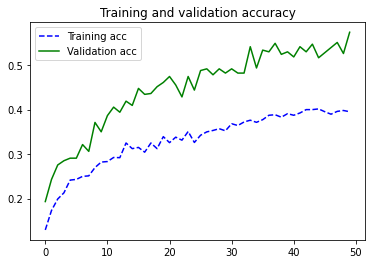

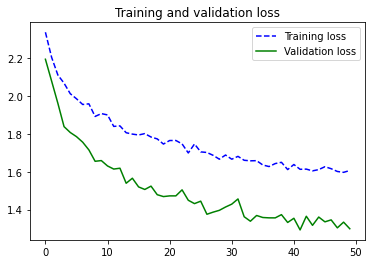

In [ ]:
plot_training_analysis(history)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

history = model.fit(
    train_generator_augmented2,
    epochs=20,
    validation_data=validation_generator2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 15,764,682
Trainable params: 1,049,994
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
 54/158 [=========>....................] - ETA: 34s - loss: 2.4343 - acc: 0.1283

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 66s 414ms/step - loss: 2.2976 - acc: 0.1671 - val_loss: 1.8180 - val_acc: 0.3480
Epoch 2/20
158/158 [==============================] - 65s 410ms/step - loss: 1.9202 - acc: 0.3067 - val_loss: 1.6495 - val_acc: 0.3977
Epoch 3/20
158/158 [==============================] - 65s 410ms/step - loss: 1.7860 - acc: 0.3628 - val_loss: 1.5566 - val_acc: 0.4646
Epoch 4/20
158/158 [==============================] - 64s 406ms/step - loss: 1.6855 - acc: 0.3751 - val_loss: 1.4634 - val_acc: 0.4952
Epoch 5/20
158/158 [==============================] - 64s 409ms/step - loss: 1.6258 - acc: 0.4022 - val_loss: 1.4036 - val_acc: 0.5201
Epoch 6/20
158/158 [==============================] - 64s 408ms/step - loss: 1.5428 - acc: 0.4408 - val_loss: 1.4065 - val_acc: 0.5124
Epoch 7/20
158/158 [==============================] - 65s 408ms/step - loss: 1.5029 - acc: 0.4636 - val_loss: 1.3049 - val_acc: 0.5354
Epoch 8/20
158/158 [==============================] - 64s 407ms/st

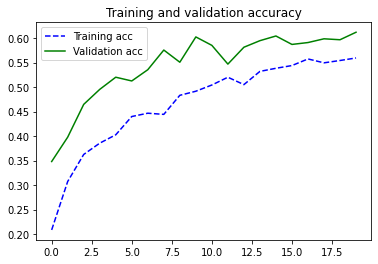

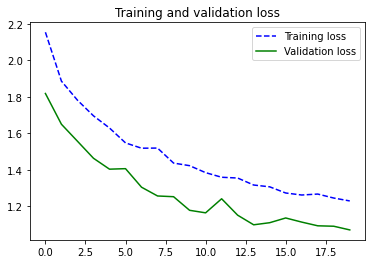

In [ ]:
plot_training_analysis(history)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

history = model.fit(
    train_generator_augmented2,
    epochs=50,
    validation_data=validation_generator2)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 15,764,682
Trainable params: 1,049,994
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


158/158 [==============================] - 66s 413ms/step - loss: 2.2192 - acc: 0.2020 - val_loss: 1.7088 - val_acc: 0.3709
Epoch 2/50
158/158 [==============================] - 65s 409ms/step - loss: 1.7774 - acc: 0.3607 - val_loss: 1.5123 - val_acc: 0.4532
Epoch 3/50
158/158 [==============================] - 64s 408ms/step - loss: 1.5749 - acc: 0.4297 - val_loss: 1.3616 - val_acc: 0.5048
Epoch 4/50
158/158 [==============================] - 64s 408ms/step - loss: 1.4827 - acc: 0.4804 - val_loss: 1.3370 - val_acc: 0.5067
Epoch 5/50
158/158 [==============================] - 64s 407ms/step - loss: 1.4297 - acc: 0.4804 - val_loss: 1.3062 - val_acc: 0.5201
Epoch 6/50
158/158 [==============================] - 64s 407ms/step - loss: 1.3725 - acc: 0.5081 - val_loss: 1.2817 - val_acc: 0.5296
Epoch 7/50
158/158 [==============================] - 64s 407ms/step - loss: 1.2713 - acc: 0.5473 - val_loss: 1.1899 - val_acc: 0.5793
Epoch 8/50
158/158 [==============================] - 65s 409ms/st

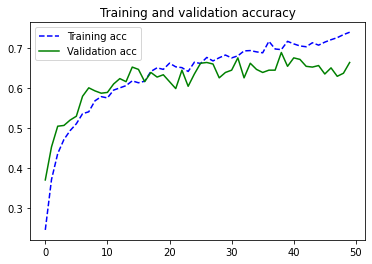

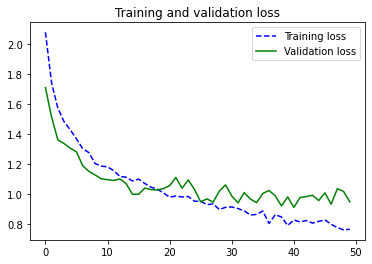

In [ ]:
plot_training_analysis(history)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

history = model.fit(
    train_generator_augmented2,
    epochs=40,
    validation_data=validation_generator2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 15,764,682
Trainable params: 1,049,994
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/40
 16/126 [==>...........................] - ETA: 9:20 - loss: 2.4858 - acc: 0.0981

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


126/126 [==============================] - 782s 6s/step - loss: 2.2921 - acc: 0.1678 - val_loss: 1.8866 - val_acc: 0.2887
Epoch 2/40
126/126 [==============================] - 776s 6s/step - loss: 1.9177 - acc: 0.3096 - val_loss: 1.6894 - val_acc: 0.3728
Epoch 3/40
126/126 [==============================] - 779s 6s/step - loss: 1.7544 - acc: 0.3556 - val_loss: 1.5017 - val_acc: 0.4665
Epoch 4/40
126/126 [==============================] - 777s 6s/step - loss: 1.6853 - acc: 0.3838 - val_loss: 1.4515 - val_acc: 0.4952
Epoch 5/40
126/126 [==============================] - 780s 6s/step - loss: 1.5631 - acc: 0.4454 - val_loss: 1.4229 - val_acc: 0.4895
Epoch 6/40
126/126 [==============================] - 776s 6s/step - loss: 1.5318 - acc: 0.4525 - val_loss: 1.3914 - val_acc: 0.4914
Epoch 7/40
126/126 [==============================] - 807s 6s/step - loss: 1.4864 - acc: 0.4663 - val_loss: 1.2941 - val_acc: 0.5315
Epoch 8/40
126/126 [==============================] - 772s 6s/step - loss: 1.442

In [ ]:
modelF = models.Sequential()
modelF.add(conv_base)
modelF.add(layers.Flatten())
modelF.add(layers.Dense(128, activation='relu'))
modelF.add(layers.Dropout(0.2))
modelF.add(layers.Dense(64, activation='relu'))
modelF.add(layers.Dropout(0.2))
modelF.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False
modelF.summary()

modelF.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

historyF = modelF.fit(
    train_generator_augmented2,
    epochs=60,
    validation_data=validation_generator2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


84/84 [==============================] - 85s 1s/step - loss: 2.3407 - acc: 0.1221 - val_loss: 2.1009 - val_acc: 0.2447
Epoch 2/60
84/84 [==============================] - 77s 923ms/step - loss: 2.1050 - acc: 0.2196 - val_loss: 1.8532 - val_acc: 0.3365
Epoch 3/60
84/84 [==============================] - 77s 914ms/step - loss: 1.9546 - acc: 0.2826 - val_loss: 1.7390 - val_acc: 0.3996
Epoch 4/60
84/84 [==============================] - 78s 928ms/step - loss: 1.8851 - acc: 0.2933 - val_loss: 1.6363 - val_acc: 0.4340
Epoch 5/60
84/84 [==============================] - 79s 942ms/step - loss: 1.8211 - acc: 0.3357 - val_loss: 1.5457 - val_acc: 0.4474
Epoch 6/60
84/84 [==============================] - 79s 936ms/step - loss: 1.7911 - acc: 0.3421 - val_loss: 1.4852 - val_acc: 0.4608
Epoch 7/60
84/84 [==============================] - 78s 930ms/step - loss: 1.7103 - acc: 0.3785 - val_loss: 1.4604 - val_acc: 0.4914
Epoch 8/60
84/84 [==============================] - 78s 927ms/step - loss: 1.6507 -

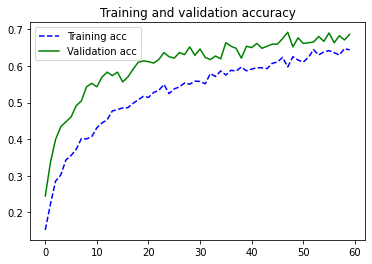

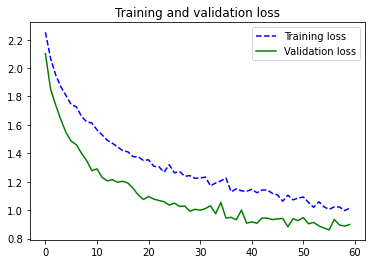

In [ ]:
plot_training_analysis(historyF)

# Test des modèle entrainés en version 2 : CNN de base + Model Transfer Learning avec VGG-16.


##Test des perfomances du modèle CNN de base

In [ ]:
modelF.save('classification_images_vgg16_128_64.h5')

In [ ]:
from google.colab import files
files.download("classification_images_vgg16_128_64.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x2_test, y2_test = load_data2(path, labels2, dataset='Dataset/Test', image_size=150)


In [ ]:
y2_test_evaluate = keras.utils.to_categorical(y2_test)
score = modelF.evaluate(x2_test, y2_test_evaluate, verbose=1)


17/17 [==============================] - 10s 278ms/step - loss: 67.8232 - acc: 0.3764


In [ ]:
y2_predicted = modelF.predict_classes(x2_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


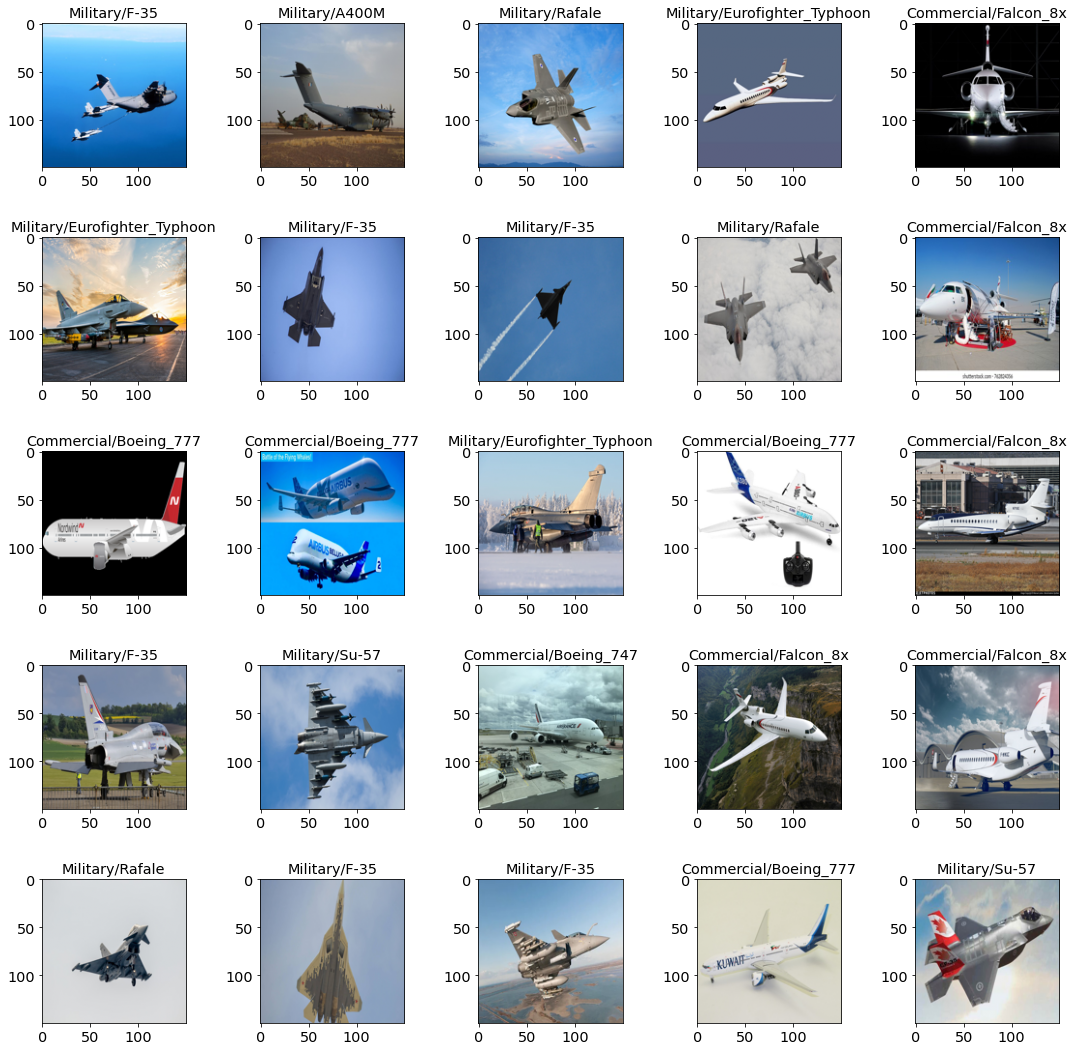

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 15))

random_index = random.sample(range(1, 500), 25)


for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    image2 = x2_test[random_index[i]]
    plt.title(labels2[int(y2_predicted[random_index[i]])])
    plt.imshow(image2/255)

plt.tight_layout()
plt.show()

In [ ]:
test_features = modelF.predict_classes(test_generator2)
print(test_features)

In [ ]:
true_labels = np.asarray(test_generator2.classes)
print(true_labels)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools


In [ ]:
predictions = np.round(modelF.predict(x2_test),0)
label_classes =['Commercial/Airbus_A380','Commercial/Airbus_Belluga','Commercial/Boeing_747','Commercial/Boeing_777','Commercial/Falcon_8x','Military/A400M','Military/Eurofighter_Typhoon','Military/Rafale','Military/F-35','Military/Su-57']

In [ ]:
classification_metrics = metrics.classification_report(y2_test_evaluate, predictions, target_names = label_classes )

In [ ]:
print(classification_metrics)

                              precision    recall  f1-score   support

      Commercial/Airbus_A380       0.33      0.04      0.07        50
   Commercial/Airbus_Belluga       0.80      0.10      0.17        42
       Commercial/Boeing_747       0.34      0.51      0.41        45
       Commercial/Boeing_777       0.27      0.73      0.39        45
        Commercial/Falcon_8x       0.41      0.62      0.49        45
              Military/A400M       0.85      0.65      0.74        63
Military/Eurofighter_Typhoon       0.46      0.48      0.47        66
             Military/Rafale       0.17      0.17      0.17        60
               Military/F-35       0.19      0.15      0.17        66
              Military/Su-57       0.56      0.34      0.42        44

                   micro avg       0.38      0.38      0.38       526
                   macro avg       0.44      0.38      0.35       526
                weighted avg       0.43      0.38      0.35       526
                 s

Matrice de confusion 

In [ ]:
categorical_test_labels = pd.DataFrame(y2_test_evaluate).idxmax(axis=1)
categorical_predictions = pd.DataFrame(predictions).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion_matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

[[ 2  0 14 25  6  2  1  0  0  0]
 [ 0  4 14 16  3  1  2  1  0  1]
 [ 2  0 23 17  1  0  0  1  0  1]
 [ 0  0  5 33  3  0  1  1  2  0]
 [ 0  0  3  9 28  0  2  2  1  0]
 [ 0  1  1  9  4 41  2  1  4  0]
 [ 1  0  2  2  6  0 32  5 14  4]
 [ 1  0  2  1  8  1 20 10 15  2]
 [ 0  0  2  8  5  3  6 28 10  4]
 [ 0  0  1  3  5  0  3  9  8 15]]
Confusion matrix, without normalization


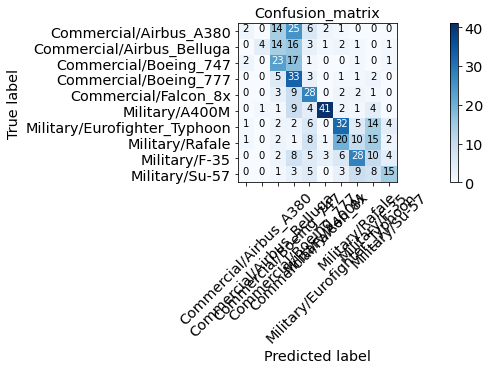

In [ ]:
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,label_classes)

##Test des performances du modèle du transfert learning avec VGG-16

In [ ]:
model2.save('classification_images_vgg16_256.h5')

In [ ]:
from google.colab import files
files.download('classification_images_vgg16_256.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x2_test, y2_test = load_data2(path, labels2, dataset='Dataset/Test', image_size=150)



In [ ]:
y2_test_evaluate = keras.utils.to_categorical(y2_test)
score_2 = model2.evaluate(x2_test, y2_test_evaluate, verbose=1)

17/17 [==============================] - 3s 136ms/step - loss: 170.8681 - acc: 0.5076


In [ ]:
y2_predicted = model2.predict_classes(x2_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


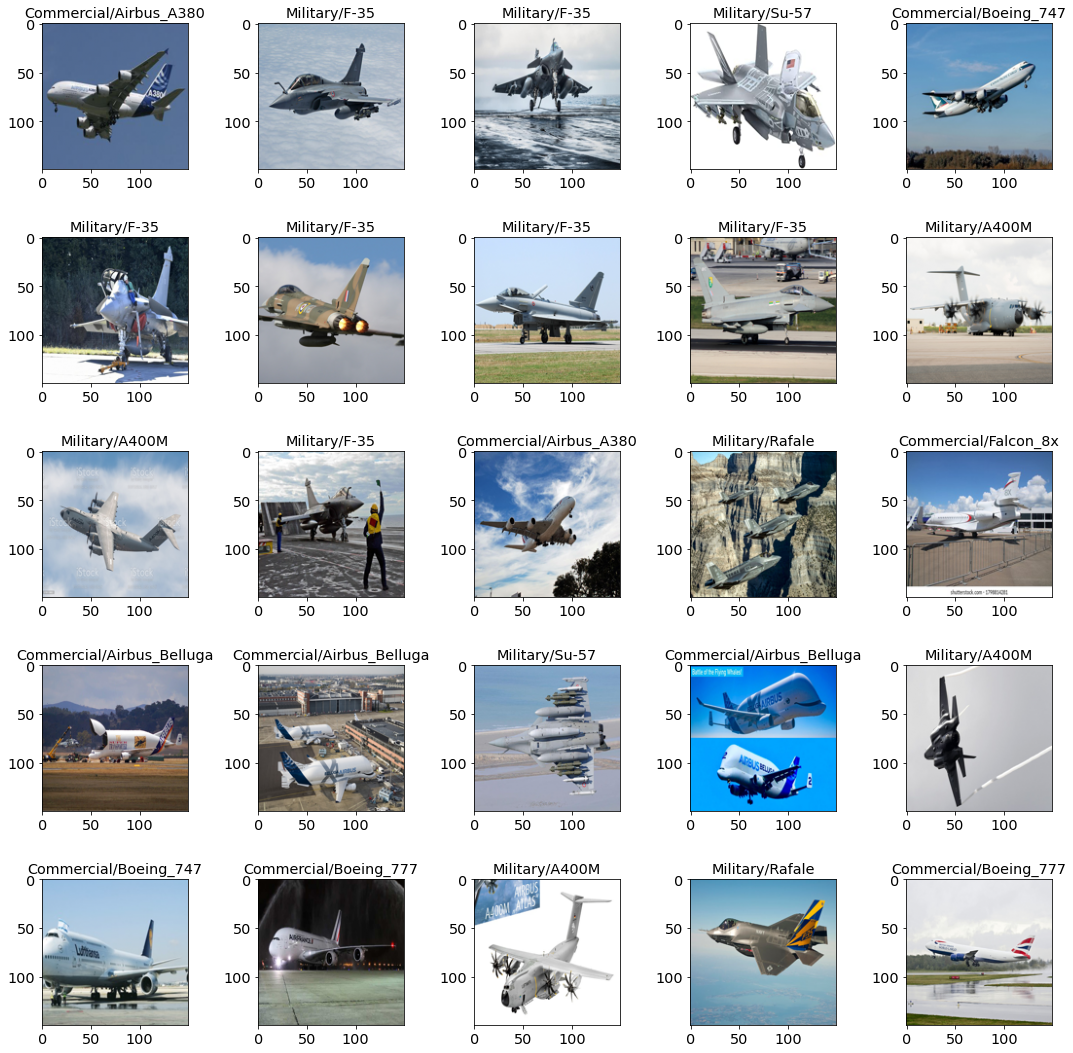

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 15))

random_index = random.sample(range(1, 500), 25)


for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    image2 = x2_test[random_index[i]]
    plt.title(labels2[int(y2_predicted[random_index[i]])])
    plt.imshow(image2/255)

plt.tight_layout()
plt.show()

In [ ]:
test_features = model2.predict_classes(test_generator2)
print(test_features)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[2 7 1 3 7 9 3 9 4 8 1 5 5 6 3 6 2 5 5 7 6 6 7 6 8 1 3 0 2 9 6 2 8 1 6 6 1
 9 4 9 5 8 7 1 8 4 5 5 1 6 9 6 8 7 3 5 9 9 4 9 0 5 0 9 6 3 3 7 7 5 7 6 2 8
 3 2 5 5 0 0 4 5 7 9 8 5 0 8 4 5 3 4 8 4 7 3 3 3 8 9 7 8 9 4 4 4 6 2 2 7 4
 9 0 9 3 4 5 3 4 1 7 8 7 6 8 5 0 3 8 8 6 3 7 4 0 0 7 4 9 9 4 9 7 8 8 8 2 7
 8 5 8 4 7 1 6 5 7 5 3 7 6 6 6 2 1 3 0 8 8 3 8 6 5 2 4 7 0 6 7 8 1 9 6 6 6
 6 4 3 4 3 6 3 1 6 1 4 7 0 1 5 8 8 2 0 5 6 2 6 7 8 6 1 7 9 9 3 1 2 0 3 8 8
 1 5 0 2 3 8 7 1 4 0 4 4 1 8 6 4 0 0 5 8 0 1 8 6 4 5 3 3 1 8 9 6 7 5 5 9 5
 4 2 3 1 1 4 1 0 8 9 0 7 9 1 9 2 5 5 1 8 6 5 5 9 4 7 3 4 0 7 0 7 9 6 1 4 6
 6 4 8 5 9 8 1 5 0 1 7 3 3 4 4 5 3 1 1 8 9 2 6 3 3 2 8 8 5 1 6 1 4 9 2 1 7
 2 7 8 6 8 3 5 3 6 4 7 8 8 3 2 4 5 6 3 8 3 1 5 8 0 2 4 1 5 1 8 0 5 8 5 3 8
 5 3 8 7 3 5 1 2 5 8 8 5 1 8 1 5 5 1 5 4 1 5 9 3 8 7 1 8 7 7 6 8 1 5 9 3 5
 9 5 6 4 1 3 7 0 7 5 7 7 9 1 1 4 5 2 6 7 5 1 1 6 6 8 4 7 9 1 0 9 0 6 9 3 7
 0 7 5 5 0 1 0 8 8 8 0 5 4 5 4 4 2 1 8 6 0 5 0 7 0 5 8 9 3 3 0 6 2 8 6 7 5
 6 1 6 3 7 4 3 8 0 3 4 4 

In [ ]:
true_labels = np.asarray(test_generator2.classes)
print(true_labels)

[1 3 0 2 7 5 0 5 7 9 4 1 0 2 4 1 5 5 1 1 9 8 8 5 6 0 6 7 8 2 7 7 6 7 7 4 8
 4 5 8 2 1 4 6 8 0 1 6 1 0 4 5 8 9 7 8 3 2 8 8 6 7 8 2 7 6 5 2 6 0 3 3 1 5
 8 9 6 1 6 2 4 3 1 0 3 3 4 1 7 6 8 6 9 6 0 6 7 6 0 8 6 1 2 8 0 2 4 3 5 6 8
 3 8 7 5 4 8 5 8 3 5 2 4 2 4 0 8 1 8 9 0 0 1 2 6 9 9 0 2 0 7 6 7 7 6 3 0 1
 3 7 2 6 2 1 5 8 5 5 7 1 7 4 8 4 4 1 7 4 4 3 0 5 0 0 5 8 9 5 3 7 7 5 6 7 7
 8 2 9 6 1 3 5 2 4 7 7 7 9 7 7 6 5 8 9 4 0 5 3 5 7 3 6 8 6 9 6 5 0 0 6 8 7
 6 8 5 6 0 2 0 9 5 0 3 8 7 6 9 5 9 3 8 2 6 6 5 6 6 9 1 4 3 7 9 4 9 5 3 4 7
 7 3 5 7 7 1 8 4 5 9 9 5 6 5 6 0 1 8 4 4 6 9 1 2 4 1 1 1 4 3 1 9 7 0 4 5 8
 4 4 2 8 7 7 4 6 9 0 2 3 8 9 0 8 8 5 1 2 7 2 6 9 0 1 3 8 1 5 5 2 4 0 7 8 5
 2 4 0 5 7 5 2 0 6 5 5 7 9 0 3 9 4 3 3 0 6 8 1 4 7 0 7 0 2 6 7 9 5 7 6 2 2
 6 6 6 9 2 7 5 3 5 9 6 4 9 0 7 2 7 4 7 5 3 2 3 3 0 7 7 3 8 5 2 7 4 8 4 8 7
 6 7 5 9 9 3 1 1 9 1 6 8 6 2 5 1 8 3 5 1 6 3 2 7 4 6 6 0 8 5 5 0 8 0 9 0 3
 3 8 6 9 3 9 7 0 7 2 6 6 7 3 9 8 8 2 3 2 8 8 2 5 5 9 2 8 2 6 6 5 1 7 6 5 7
 5 9 0 1 4 1 9 6 5 9 6 0 

In [ ]:
predictions = np.round(model2.predict(x2_test),0)

In [ ]:
classification_metrics = metrics.classification_report(y2_test_evaluate, predictions, target_names = label_classes )

In [ ]:
print(classification_metrics)

                              precision    recall  f1-score   support

      Commercial/Airbus_A380       0.57      0.52      0.54        50
   Commercial/Airbus_Belluga       0.85      0.83      0.84        42
       Commercial/Boeing_747       0.84      0.58      0.68        45
       Commercial/Boeing_777       0.45      0.82      0.58        45
        Commercial/Falcon_8x       0.53      0.93      0.67        45
              Military/A400M       0.87      0.75      0.80        63
Military/Eurofighter_Typhoon       0.87      0.20      0.32        66
             Military/Rafale       0.06      0.03      0.04        60
               Military/F-35       0.06      0.08      0.07        66
              Military/Su-57       0.49      0.77      0.60        44

                   micro avg       0.51      0.51      0.51       526
                   macro avg       0.56      0.55      0.52       526
                weighted avg       0.55      0.51      0.49       526
                 s

In [ ]:
categorical_test_labels = pd.DataFrame(y2_test_evaluate).idxmax(axis=1)
categorical_predictions = pd.DataFrame(predictions).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_predictions)

[[26  1  4 15  3  1  0  0  0  0]
 [ 0 35  0  4  1  0  0  1  0  1]
 [ 7  0 26  9  1  0  1  0  0  1]
 [ 3  1  1 37  2  0  0  0  0  1]
 [ 0  0  0  3 42  0  0  0  0  0]
 [ 3  2  0  3  5 47  1  0  2  0]
 [ 1  1  0  3 10  1 13  1 27  9]
 [ 1  0  0  1  5  3  0  2 43  5]
 [ 3  0  0  5  6  2  0 27  5 18]
 [ 2  1  0  2  5  0  0  0  0 34]]
Confusion matrix, without normalization


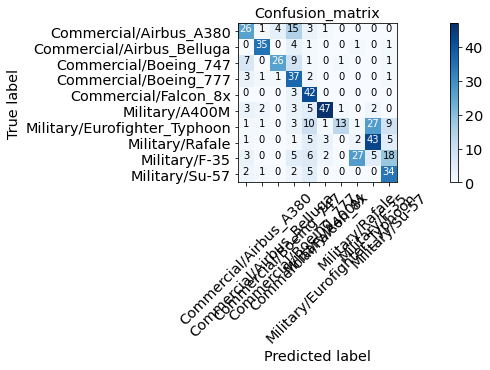

In [ ]:
print(confusion_matrix)
plot_confusion_matrix(confusion_matrix,label_classes)